<a target="_blank" href="https://colab.research.google.com/github/">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Tensorflow
# TensorFlow vs. PyTorch: A Tale of Two Deep Learning Giants 🧠🔍

---

# 1. Introduction: Tensor Math with a Sprinkle of Keras Magic  
At their core, **TensorFlow** and **PyTorch** are frameworks designed to perform *tensor algebra*—the lifeblood of deep learning.  
Tensors are fancy, multidimensional arrays that enable efficient data manipulation on GPUs.

- **TensorFlow**: Known for its robust **Keras** API, a high-level library for building models easily.  
  Think of Keras as LEGO bricks that make TensorFlow approachable for beginners and scalable for production.
  
- **PyTorch**: Offers a more Pythonic and intuitive interface, loved by researchers for its dynamic computation graph.  
  It’s like the Swiss Army knife for prototyping!

---

# 2. Attributes of Tensors: The Building Blocks of Deep Learning  
Tensors have several key attributes:  

- **Rank**: The number of dimensions a tensor has.  
  - Example: A scalar (single number) has rank 0, a vector has rank 1, and a matrix has rank 2.  

- **Order**: Synonymous with rank; another term for it.  

- **Shape**: The size of each dimension in the tensor.  
  For instance, a tensor with shape `(3, 4, 5)` has 3 dimensions.  

- **Datatype**: Tensors can store data of different types like `float32`, `int64`, etc.  

> **Fun Fact**: In PyTorch, `tensor.dtype` is like the recipe for your tensor, while `tensor.shape` tells you its serving size. 🍽️

---

# 3. Methods/Operations on Tensors: Math on Steroids  
Both frameworks excel at tensor operations. Here’s a taste of what you can do:  

- **Matrix Multiplication**:  
  - TensorFlow: `tf.matmul(a, b)`  
  - PyTorch: `torch.mm(a, b)`  

- **Element-wise Operations**:  
  Operations like addition, subtraction, etc., applied element by element.  

- **Gradients and Autograd**:  
  Both frameworks support automatic differentiation.  
  - TensorFlow: Handles gradients with `tf.GradientTape()`.  
  - PyTorch: Offers `torch.autograd` with dynamic computation graphs, perfect for experimentation.  

> PyTorch’s dynamic graph lets you modify the graph on the fly, while Tenso


## Importing libraries

In [1]:
import tensorflow as tf

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Attributes & Data
Tensors have shapes. Some vocabulary:

Shape: The length (number of elements) of each of the axes of a tensor.

Rank: Number of tensor axes. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.

Axis or Dimension: A particular dimension of a tensor.

Size: The total number of items in the tensor, the product of the shape vector's elements.


In [3]:
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

In [4]:
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


In [5]:
tf.rank(x)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [6]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [7]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [8]:
x @ tf.transpose(x) #Matmul

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [9]:
tf.matmul(x, tf.transpose(x)) #Matmul

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [10]:
tf.tensordot(x, x, axes = (1,1)) #Tensor dot

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [11]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [12]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.6652409 ],
       [0.09003057, 0.24472848, 0.6652409 ]], dtype=float32)>

In [13]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [14]:
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [15]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


Ragged Tensors
A tensor with variable numbers of elements along some axis is called "ragged". Use tf.ragged.RaggedTensor for ragged data.

For example, This cannot be represented as a regular tensor:

In [16]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

In [17]:
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Can't convert non-rectangular Python sequence to Tensor.


In [18]:
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


String tensors
tf.string is a dtype, which is to say you can represent data as strings (variable-length byte arrays) in tensors.

The strings are atomic and cannot be indexed the way Python strings are. The length of the string is not one of the axes of the tensor. See tf.strings for functions to manipulate them.

In [19]:
# Tensors can be strings, too here is a scalar string.
scalar_string_tensor = tf.constant("Gray wolf")
print(scalar_string_tensor)

tf.Tensor(b'Gray wolf', shape=(), dtype=string)


Sparse tensors:
Sometimes, your data is sparse, like a very wide embedding space. TensorFlow supports tf.sparse.SparseTensor and related operations to store sparse data efficiently.

In [20]:
# Sparse tensors store values by index in a memory-efficient manner
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, "\n")

# You can convert sparse tensors to dense
print(tf.sparse.to_dense(sparse_tensor))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)


## Operations
Normal tf.Tensor objects are immutable. To store model weights (or other mutable state) in TensorFlow use a tf.Variable.

In [21]:
var = tf.Variable(x)

In [22]:
var.assign(var+2)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[3., 4., 5.],
       [6., 7., 8.]], dtype=float32)>

In [23]:
var

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[3., 4., 5.],
       [6., 7., 8.]], dtype=float32)>

In [24]:
x = tf.Variable(2.0)

In [25]:
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

In [26]:
def f(x):
  y = x**2 + 2*x - 5
  return y
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [27]:
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

In [28]:
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [29]:
@tf.function
def my_func(x):
  print('Tracing.\n')
  return tf.reduce_sum(x)

The first time you run the tf.function, although it executes in Python, it captures a complete, optimized graph representing the TensorFlow computations done within the function.

# Layers

### Common pre-existing layers
In the tf.keras.layers package, layers are objects. To construct a layer,
simply construct the object. Most layers take as a first argument the number
of output dimensions / channels.
layer = tf.keras.layers.Dense(100)
The number of input dimensions is often unnecessary, as it can be inferred
the first time the layer is used, but it can be provided if you want to
specify it manually, which is useful in some complex models.
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

### Custom layers
The best way to implement your own layer is extending the tf.keras.Layer class and implementing:

* __init__ , where you can do all input-independent initialization
* build, where you know the shapes of the input tensors and can do the rest of the initialization
* call, where you do the forward computation

Note that you don't have to wait until build is called to create your variables, you can also create them in __init__. However, the advantage of creating them in build is that it enables late variable creation based on the shape of the inputs the layer will operate on. On the other hand, creating variables in __init__ would mean that shapes required to create the variables will need to be explicitly specified.

### Models: Composing layers
Many interesting layer-like things in machine learning models are implemented by composing existing layers. For example, each residual block in a resnet is a composition of convolutions, batch normalizations, and a shortcut. Layers can be nested inside other layers.


# CORE: Multiple linear regression
This quickstart tutorial demonstrates how you can use the TensorFlow Core low-level APIs to build and train a multiple linear regression model that predicts fuel efficiency. It uses the Auto MPG dataset which contains fuel efficiency data for late-1970s and early 1980s automobiles.

## Load libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

## Load and preprocess datasets
Usage of tensorflow specific named container class tf.Module for abstraction

In [31]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

In [32]:
dataset = pd.read_csv(url, names=column_names,
                       na_values='?', 
                       comment='\t',
                          sep=' ', 
                          skipinitialspace=True)

In [33]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [34]:
# Handling na values via dropping records with na
dataset = dataset.dropna()

In [35]:
# To do or think of quicker ways of applying imputation

In [36]:
dataset_tf = tf.convert_to_tensor(dataset, dtype=tf.float32)
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [37]:
dataset_shuffled = tf.random.shuffle(dataset_tf, seed=22)
train_data, test_data = dataset_shuffled[100:], dataset_shuffled[:100]
x_train, y_train = train_data[:, 1:], train_data[:, 0]
x_test, y_test = test_data[:, 1:], test_data[:, 0]

In [38]:
def onehot_origin(x):
  "Encoding label encoded origins which will be problematic to be used as numeric data features"
  origin = tf.cast(x[:, -1], tf.int32)
  # Use `origin - 1` to account for 1-indexed feature
  origin_oh = tf.one_hot(origin - 1, 3)
  x_ohe = tf.concat([x[:, :-1], origin_oh], axis = 1)
  return x_ohe

In [39]:
x_train_ohe, x_test_ohe = onehot_origin(x_train), onehot_origin(x_test)
x_train_ohe.numpy()

array([[  4., 120.,  75., ...,   0.,   0.,   1.],
       [  4., 119.,  97., ...,   0.,   0.,   1.],
       [  4., 140.,  90., ...,   1.,   0.,   0.],
       ...,
       [  6., 250., 105., ...,   1.,   0.,   0.],
       [  4., 120.,  87., ...,   0.,   1.,   0.],
       [  6., 232.,  90., ...,   1.,   0.,   0.]], dtype=float32)

In [40]:
class Normalize(tf.Module):
  def __init__(self, x):
    # Initialize the mean and standard deviation for normalization
    self.mean = tf.math.reduce_mean(x, axis=0)
    self.std = tf.math.reduce_std(x, axis=0)

  def norm(self, x):
    # Normalize the input

    return (x - self.mean)/self.std

  def unnorm(self, x):
    # Unnormalize the input
    return (x * self.std) + self.mean

In [41]:
norm_x = Normalize(x_train_ohe)
norm_y = Normalize(y_train)
x_train_norm, y_train_norm = norm_x.norm(x_train_ohe), norm_y.norm(y_train)
x_test_norm, y_test_norm = norm_x.norm(x_test_ohe), norm_y.norm(y_test)

## Build Model (Abstracted as sequential and layers in keras)
Again using tf.Module for abstraction

In [42]:
class LinearRegression(tf.Module):

  def __init__(self):
    self.built = False

  @tf.function
  def __call__(self, x):
    # Initialize the model parameters on the first call
    if not self.built:
      # Randomly generate the weight vector and bias term
      rand_w = tf.random.uniform(shape=[x.shape[-1], 1])
      rand_b = tf.random.uniform(shape=[])
      self.w = tf.Variable(rand_w)
      self.b = tf.Variable(rand_b)
      self.built = True
    y = tf.add(tf.matmul(x, self.w), self.b)
    return tf.squeeze(y, axis=1)

In [43]:
lin_reg = LinearRegression()
prediction = lin_reg(x_train_norm[:1])
prediction_unnorm = norm_y.unnorm(prediction)
prediction_unnorm.numpy()

array([28.786407], dtype=float32)

## Defining loss function (Abstracted as compile in keras)

In [44]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

## Training and evaluation functions (Abstracted as fit and predict functions in keras)

In [45]:
### Minibatch gradient descent

In [46]:
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train_norm))
train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0]).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_norm, y_test_norm))
test_dataset = test_dataset.shuffle(buffer_size=x_test.shape[0]).batch(batch_size)

In [47]:
# Set training parameters
epochs = 100
learning_rate = 0.01
train_losses, test_losses = [], []

In [48]:
# Format training loop
for epoch in range(epochs):
  batch_losses_train, batch_losses_test = [], []

  # Iterate through the training data
  for x_batch, y_batch in train_dataset:
    with tf.GradientTape() as tape:
      y_pred_batch = lin_reg(x_batch)
      batch_loss = mse_loss(y_pred_batch, y_batch)
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, lin_reg.variables)
    for g,v in zip(grads, lin_reg.variables):
      v.assign_sub(learning_rate * g)
    # Keep track of batch-level training performance 
    batch_losses_train.append(batch_loss)

  # Iterate through the testing data
  for x_batch, y_batch in test_dataset:
    y_pred_batch = lin_reg(x_batch)
    batch_loss = mse_loss(y_pred_batch, y_batch)
    # Keep track of batch-level testing performance 
    batch_losses_test.append(batch_loss)

  # Keep track of epoch-level model performance
  train_loss = tf.reduce_mean(batch_losses_train)
  test_loss = tf.reduce_mean(batch_losses_test)
  train_losses.append(train_loss)
  test_losses.append(test_loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {train_loss.numpy():0.3f}')

# Output final losses
print(f"\nFinal train loss: {train_loss:0.3f}")
print(f"Final test loss: {test_loss:0.3f}")

Mean squared error for step 0: 3.202
Mean squared error for step 10: 0.444
Mean squared error for step 20: 0.293
Mean squared error for step 30: 0.244
Mean squared error for step 40: 0.222
Mean squared error for step 50: 0.211
Mean squared error for step 60: 0.219
Mean squared error for step 70: 0.217
Mean squared error for step 80: 0.201
Mean squared error for step 90: 0.203

Final train loss: 0.201
Final test loss: 0.184


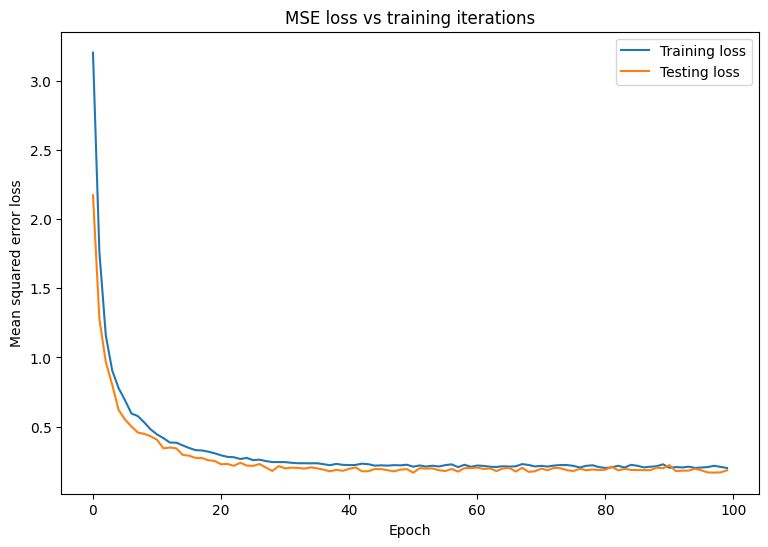

In [49]:
matplotlib.rcParams['figure.figsize'] = [9, 6]

plt.plot(range(epochs), train_losses, label = "Training loss")
plt.plot(range(epochs), test_losses, label = "Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Mean squared error loss")
plt.legend()
plt.title("MSE loss vs training iterations");

## Save and export model-  tf.saved_model.save

In [50]:
class ExportModule(tf.Module):
  def __init__(self, model, extract_features, norm_x, norm_y):
    # Initialize pre and postprocessing functions
    self.model = model
    self.extract_features = extract_features
    self.norm_x = norm_x
    self.norm_y = norm_y

  @tf.function(input_signature=[tf.TensorSpec(shape=[None, None], dtype=tf.float32)]) 
  def __call__(self, x):
    # Run the ExportModule for new data points
    x = self.extract_features(x)
    x = self.norm_x.norm(x)
    y = self.model(x)
    y = self.norm_y.unnorm(y)
    return y

In [51]:
lin_reg_export = ExportModule(model=lin_reg,
                              extract_features=onehot_origin,
                              norm_x=norm_x,
                              norm_y=norm_y)

In [52]:
import tempfile
import os

models = tempfile.mkdtemp()
save_path = os.path.join(models, 'lin_reg_export')
tf.saved_model.save(lin_reg_export, save_path)

INFO:tensorflow:Assets written to: C:\Users\986hi\AppData\Local\Temp\tmpvthxx99f\lin_reg_export\assets


INFO:tensorflow:Assets written to: C:\Users\986hi\AppData\Local\Temp\tmpvthxx99f\lin_reg_export\assets


In [53]:
lin_reg_loaded = tf.saved_model.load(save_path)
test_preds = lin_reg_loaded(x_test)
test_preds[:10].numpy()

array([25.681389, 20.276926, 19.443346, 25.060396, 22.83768 ,  7.824486,
       34.284355, 12.265328, 26.206448,  8.118362], dtype=float32)

# Binary classification using Keras and csv dataframe
This tutorial provides examples of how to load pandas DataFrames into TensorFlow.

You will use a small heart disease dataset provided by the UCI Machine Learning Repository. There are several hundred rows in the CSV. Each row describes a patient, and each column describes an attribute. You will use this information to predict whether a patient has heart disease, which is a binary classification task.

## Import libraries

In [54]:
import numpy as np

## Load datasets and planning

In [55]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

In [56]:
df = pd.read_csv(csv_file)

In [57]:
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0


In [58]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

In [59]:
target = df.pop('target')

## Data ingestion and preprocessing
We will create he preprocessing into the model. While you could preprocess into dataframe using your familiar frameworks like Pandas and Polaris. It is best to build in model due to below reasons.
Why Not Preprocess in the DataFrame?
* Data Leakage: If you compute statistics (e.g., mean/std) on the entire dataset (instead of just the training split), you risk leaking information into validation/test data.

* Deployment Complexity: You’d need to reapply the same pandas preprocessing steps every time you use the model, which is error-prone.

* Scalability: Manual preprocessing doesn’t work for large datasets or streaming data.

Best Practice
Use Keras preprocessing layers or TensorFlow Transform (TFT) for:

* Consistency: Preprocessing logic is baked into the model.

* Portability: The saved model includes preprocessing, so no extra code is needed during deployment.

* Adaptability: Preprocessors automatically handle new data with the same logic.

In [60]:
# Let's create a list of columns falling onto each data type category
binary_feature_names = ['sex', 'fbs', 'exang']
categorical_feature_names = ['cp', 'restecg', 'slope', 'thal', 'ca']
numeric_feature_names = ['age', 'thalach', 'trestbps',  'chol', 'oldpeak']
numeric_features = df[numeric_feature_names]
# Remaining will be numerical columns
numeric_features_dict = {key: value.to_numpy()[:, tf.newaxis] for key, value in dict(numeric_features).items()}

### Keras API
This section uses the Keras Functional API to implement the preprocessing. You start by creating one tf.keras.Input for each column of the dataframe.
For each input you'll apply some transformations using Keras layers and TensorFlow ops. Each feature starts as a batch of scalars (shape=(batch,)). The output for each should be a batch of tf.float32 vectors (shape=(batch, n)). The last step will concatenate all those vectors together.

In [61]:
inputs = {}
for name, column in df.items():
  if type(column[0]) == str or type(column[0]) == object:
    dtype = tf.string
  elif (name in categorical_feature_names or
        name in binary_feature_names):
    dtype = tf.int64
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

In [62]:
inputs

{'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'sex': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 'cp': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cp>,
 'trestbps': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=trestbps>,
 'chol': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=chol>,
 'fbs': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 'restecg': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=restecg>,
 'thalach': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=thalach>,
 'exang': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 'oldpeak': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=oldpeak>,
 'slope': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=slope>,
 'ca': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=ca>,
 'thal': <KerasTensor shape=(None, 1),

#### Binary inputs

In [63]:
preprocessed = []

for name in binary_feature_names:
  inp = inputs[name]
  preprocessed.append(inp)

preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>]

#### Numeric inputs

In [64]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.concatenate([value for key, value in sorted(numeric_features_dict.items())], axis=1))

In [65]:
numeric_inputs = []
for name in numeric_feature_names:
  numeric_inputs.append(inputs[name])

numeric_inputs = tf.keras.layers.Concatenate(axis=-1)(numeric_inputs)
numeric_normalized = normalizer(numeric_inputs)

preprocessed.append(numeric_normalized)

preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_1>]

#### Categorical features

In [66]:
vocab = ['a','b','c']
lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
lookup(['c','a','a','b','zzz'])

<tf.Tensor: shape=(5, 4), dtype=int64, numpy=
array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]], dtype=int64)>

In [67]:
vocab = [1,4,7,99]
lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

lookup([-1,4,1])

<tf.Tensor: shape=(3, 5), dtype=int64, numpy=
array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]], dtype=int64)>

In [68]:
for name in categorical_feature_names:
  vocab = sorted(set(df[name]))
  print(f'name: {name}')
  print(f'vocab: {vocab}\n')

  if type(vocab[0]) is str:
    lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
  else:
    lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

  x = inputs[name]
  x = lookup(x)
  preprocessed.append(x)

name: cp
vocab: [0, 1, 2, 3, 4]

name: restecg
vocab: [0, 1, 2]

name: slope
vocab: [1, 2, 3]

name: thal
vocab: ['1', '2', 'fixed', 'normal', 'reversible']

name: ca
vocab: [0, 1, 2, 3]



#### Assemble the preprocessing head

In [69]:
preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_1>,
 <KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_2>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_3>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_4>,
 <KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_5>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_6>]

In [70]:
preprocessed_result = tf.keras.layers.Concatenate(axis=1)(preprocessed)
preprocessed_result

<KerasTensor shape=(None, 33), dtype=float32, sparse=False, name=keras_tensor_7>

In [71]:
preprocessor = tf.keras.Model(inputs, preprocessed_result)


In [72]:
tf.keras.utils.plot_model(preprocessor, rankdir="LR", show_shapes=True,  show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


## Calling preprocess layer for testing

In [73]:
preprocessor(dict(df.iloc[:1]))

<tf.Tensor: shape=(1, 33), dtype=float32, numpy=
array([[  1.       ,   1.       ,   0.       ,   0.93384  ,  -1.8534899,
        123.75735  ,   3.6224306,  -7.3077087,   0.       ,   0.       ,
          1.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   1.       ,   0.       ,   0.       ,
          0.       ,   1.       ,   0.       ,   0.       ,   0.       ,
          1.       ,   0.       ,   0.       ,   0.       ,   1.       ,
          0.       ,   0.       ,   0.       ]], dtype=float32)>

## Create and train a model

In [74]:
body = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [75]:
inputs

{'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'sex': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 'cp': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cp>,
 'trestbps': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=trestbps>,
 'chol': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=chol>,
 'fbs': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 'restecg': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=restecg>,
 'thalach': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=thalach>,
 'exang': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 'oldpeak': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=oldpeak>,
 'slope': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=slope>,
 'ca': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=ca>,
 'thal': <KerasTensor shape=(None, 1),

In [76]:
x = preprocessor(inputs)
x

<KerasTensor shape=(None, 33), dtype=float32, sparse=False, name=keras_tensor_8>

In [77]:
result = body(x)
result

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_13>

In [78]:
model = tf.keras.Model(inputs, result)

model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [79]:
tf.keras.utils.plot_model(model, show_shapes=True,  show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [80]:
SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

In [81]:
history = model.fit(dict(df), target, epochs=5, batch_size=BATCH_SIZE)

ValueError: Invalid dtype: object